In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F   # contain all the activation functions 

In [ ]:
df = pd.read_csv("/content/diabetes.csv")

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# to visualise by using pair plot as pairplot take target variable as category
df['Outcome'] = np.where(df['Outcome']==1, "diabetic", 'no diabetic')

In [ ]:
df1 = df
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,diabetic
1,1,85,66,29,0,26.6,0.351,31,no diabetic
2,8,183,64,0,0,23.3,0.672,32,diabetic
3,1,89,66,23,94,28.1,0.167,21,no diabetic
4,0,137,40,35,168,43.1,2.288,33,diabetic


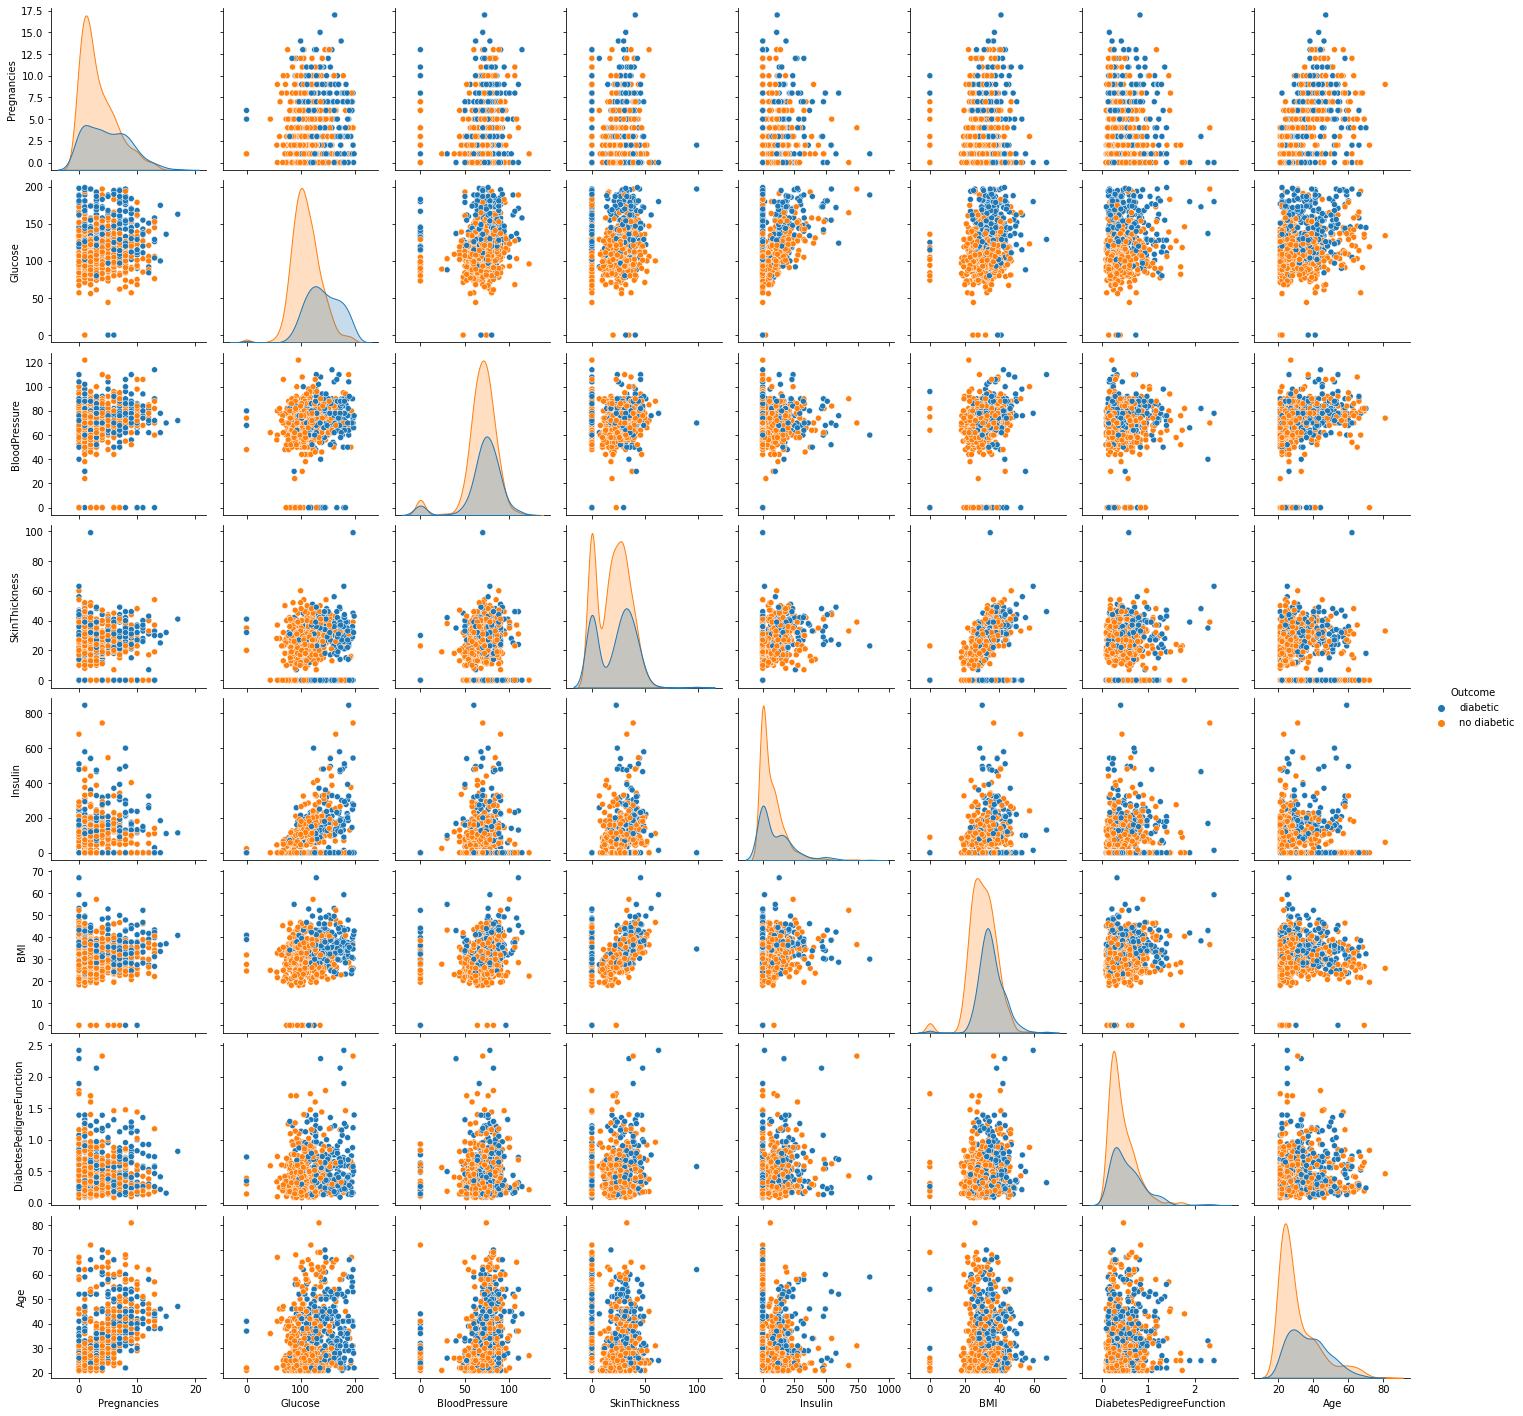

In [ ]:
sns.pairplot(df1, hue="Outcome")


# this shows the relationship between two variables

In [ ]:
X = df.drop('Outcome', axis = "columns").values   # converting our independent feature into numpy array as pytorch accepts in tensors
y= df['Outcome'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state=0)

In [ ]:
# Ctreating tensors
X_train = torch.FloatTensor(X_train)  # always we have to convert out independent variable into float tensor
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)  # Dependent feature to Long cause of Discrete Variable.
y_test = torch.LongTensor(y_test)

In [ ]:
df.shape

(768, 9)

In [ ]:
# Creating model with the help of pytorch
class ANN_Model(nn.Module):
    def __init__(self,input_features=8,hidden1=20,hidden2=20,out_features=2):  # as our columns are 9 i.e one is tagert so as, hiddent layer are just taken in random, output is binary as either 0 or 1 so it is 2
        super().__init__()                        ## inheriting the parent class i.e ANN_Model here 
        self.f_connected1=nn.Linear(input_features,hidden1)   ## connecting our input feature with the first hidden neuron
        self.f_connected2=nn.Linear(hidden1,hidden2)
        self.out=nn.Linear(hidden2,out_features)    ### connecting hidden layer with the output layer


  # for forward propagation
    def forward(self,x):
        x=F.relu(self.f_connected1(x))   # applying relu activation function throughout
        x=F.relu(self.f_connected2(x))
        x=self.out(x)
        return x

In [ ]:
torch.manual_seed(20)
model=ANN_Model()

In [ ]:
# checking parametrs
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [ ]:
## Backward propagation 
## here we define i. loss function 2. optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)    # here we are providing all the parameters of the model to optmise our loss and providing learining rate 

In [ ]:
epochs = 500
final_loss = []
for i in range(epochs):
  i=i+1
  y_pred = model.forward(X_train)   # forward propagation on training data
  loss = loss_function(y_pred, y_train)   # calculatiog our loss 
  final_loss.append(loss)  # appending our calculated loss

  # we are printing something after every 5 epochs
  if i%10==1:
    print("Epoch number: {} and the loss {}".format(i,loss.item()))
  optimizer.zero_grad() # Setting up Gradients to zero.
  loss.backward()  #   Intializing Backpropagation at this step.
  optimizer.step()  # Setting optimizer so that it optimizes once in a Step[Epoch]




Epoch number: 1 and the loss 0.2745215594768524
Epoch number: 11 and the loss 0.2720603942871094
Epoch number: 21 and the loss 0.2652541697025299
Epoch number: 31 and the loss 0.4079979658126831
Epoch number: 41 and the loss 0.4392496347427368
Epoch number: 51 and the loss 0.3150279223918915
Epoch number: 61 and the loss 0.3075444996356964
Epoch number: 71 and the loss 0.2859942317008972
Epoch number: 81 and the loss 0.2861153185367584
Epoch number: 91 and the loss 0.2818034589290619
Epoch number: 101 and the loss 0.28026872873306274
Epoch number: 111 and the loss 0.277881920337677
Epoch number: 121 and the loss 0.2751193940639496
Epoch number: 131 and the loss 0.27586233615875244
Epoch number: 141 and the loss 0.2769618034362793
Epoch number: 151 and the loss 0.2941840887069702
Epoch number: 161 and the loss 0.28662559390068054
Epoch number: 171 and the loss 0.2817752957344055
Epoch number: 181 and the loss 0.28696006536483765
Epoch number: 191 and the loss 0.28205156326293945
Epoch n

Text(0.5, 0, 'Epoch')

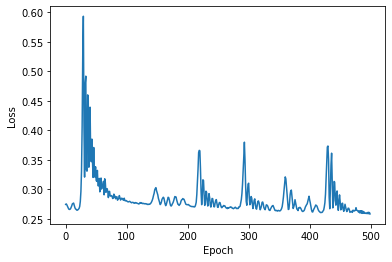

In [ ]:
# let us plot the loss
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(epochs), final_loss)
plt.ylabel('Loss')
plt.xlabel("Epoch")

In [ ]:
predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):   # help to iterate to all the test data
        y_pred=model(data)
        predictions.append(y_pred.argmax().item())   # function to convert these binary probabilites into numbers.
        
        print(y_pred.argmax().item())

1
0
0
1
0
0
1
1
1
0
1
1
0
1
0
0
1
0
1
0
1
0
0
0
0
1
0
1
0
0
0
0
0
1
0
1
1
0
0
1
0
0
0
0
1
0
0
0
1
0
0
0
1
1
0
1
0
0
0
0
1
1
0
1
1
1
1
0
0
0
0
0
0
1
1
0
0
1
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
1
0
1
0
0
1
0
0
0
0
1
1
0
1
0
1
0
1
1
0
0
1
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0


In [ ]:
predictions


[1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0]

In [ ]:
# Lets check our result 
from sklearn.metrics import confusion_matrix
result = confusion_matrix(predictions, y_test)
result

array([[89, 16],
       [18, 31]])

# We can improve our result by playing around the parameters

Text(69.0, 0.5, 'Predicted Values')

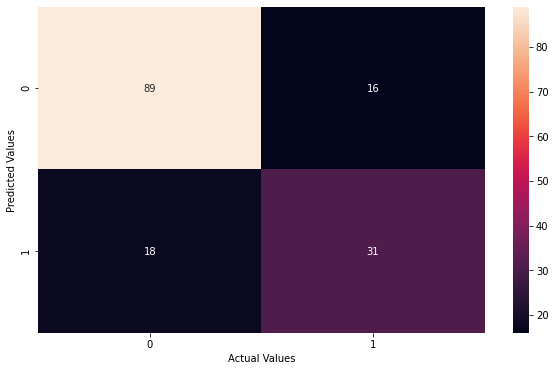

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(result,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [ ]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)
score


0.7792207792207793

In [ ]:
#### Save the model
torch.save(model,'diabetes.pt')   # extension of saving a pytorch model is pt

In [ ]:
#### Save And Load the model
model=torch.load('diabetes.pt')
model


# we can see same connected layer same model is present here

ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [ ]:

### Predcition of new data point
list(df.iloc[0,:-1])

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [ ]:

#### New Data
lst1=[6.0, 130.0, 72.0, 40.0, 0.0, 25.6, 0.627, 45.0]

In [ ]:

new_data=torch.tensor(lst1)

In [ ]:
with torch.no_grad():
    print(model(new_data))
    print(model(new_data).argmax().item())

tensor([0.3012, 2.7174])
1
